In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
# Edit file make_grid_param.py to change some default value
import make_grid_param as param

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import Modules.notebook_tools.notebook_tools as var

display(var.tra_lon, var.tra_lat, var.size_x, var.size_y, var.nx, var.ny, var.rot, var.hmin, var.hmax, var.smth_rad, var.rfact, var.smooth_meth, var.topofile, var.shp_file)

BoundedFloatText(value=15.0, description='Longitude of the grid center:', max=360.0, min=-180.0)

BoundedFloatText(value=-32.0, description='Latitude of the grid center:', max=90.0, min=-90.0)

FloatText(value=1556.0, description='X grid resolution [km]:', step=1.0)

FloatText(value=1334.0, description='Y grid resolution [km]:', step=1.0)

IntText(value=43, description='nx:')

IntText(value=44, description='ny:')

FloatText(value=0.0, description='Rotation [degree]:', step=0.1)

FloatText(value=20.0, description='Minimum depth [m]:', step=0.1)

FloatText(value=6000.0, description='Maximum depth [m]:', step=0.1)

IntText(value=4, description='Smoothing radius [nb points] (usually between 2 and 8):', step=0)

FloatText(value=0.2, description='Maximum r-fact to reach (the lower it is, the smoother it will be):', step=0…

Dropdown(description='Smoothing method:', options=('smooth', 'lsmooth', 'lsmooth_legacy', 'lsmooth2', 'lsmooth…

Text(value='./data/input/etopo2.nc', description='Topo file path:')

Text(value='./data/input/gshhs/GSHHS_shp/f/GSHHS_f_L1.shp', description='Coastline file (for the mask) file pa…

In [4]:
# Create inputs and outputs class
from Modules.tools_make_grid import inputs as inputs_init, inputs_smth as inputs_smth_init

inputs = inputs_init(var.tra_lon.value, var.tra_lat.value, var.size_x.value, var.size_y.value, var.nx.value, var.ny.value, var.rot.value)
inputs_smth = inputs_smth_init(var.hmin.value, var.hmax.value, var.smth_rad.value, var.rfact.value, var.smooth_meth.value)

In [20]:
# Create lon/lat grid
from Modules.tools_make_grid import EasyGrid
outputs = EasyGrid.easygrid(None, inputs)

In [21]:
# --- Build mask and topo -----------------------------------------
from Modules.tools_make_grid import GetTopo
GetTopo.topo(None, outputs, param.topofile, param.shp_file, smooth=inputs_smth, sgl_connect=param.sgl_connect)

Reading topography file: ./data/input/etopo2.nc
Single region dataset imin/imax= 5499 6201
Bounding indices of the relevant part to be extracted from the entire dataset:
 imin,imax = 5499 6201 out of 10800 jmin,jmax = 1506 1986 out of 5400
Interpolating topography to ROMS grid

 Geographical extents of the dataset:
    Longitude min/max =    3.300000   26.700001
    Latitude  min/max =  -39.799999  -23.799999

 Geographical extents of requested ROMS grid:
    Longitude min/max =    3.360625   26.639375
    Latitude  min/max =  -39.749981  -23.853737

 Bounding indices for the portion of dataset covering the entire model grid:
 iwest,ieast =    2   701 out of   703 jsouth,jnorth =    2   479 out of   481

 Averaging window width = 4.00000 in grid spaces.

..........

 Wall Clock time spent to compute hraw    0.71 sec running   1 threads.
Finished interpolating
Building mask from  ./data/input/gshhs/GSHHS_shp/f/GSHHS_f_L1.shp
 enter smooth_thread r_max = 0.2000000  iters_cond =  500  ite

 set_tiles: nx =  44 ny =  43 numthreads =  1 nsub_x =  1 nsub_y =  4
  nsub_x =   1  nsub_y =   4  isize =  44  jsize =  11  trd =   0

 iter  i,jrx_max rx_max              i,jry_max ry_max
 ------------------------------------------------------------------
    0    13   44 rx_max = 0.8443954    38   23 ry_max = 0.8522583
    1    13   43 rx_max = 0.6366944    39   23 ry_max = 0.6435893
    2    13   43 rx_max = 0.5302909    39   23 ry_max = 0.5400500
    3    13   42 rx_max = 0.4654372    39   23 ry_max = 0.4702033
    4    13   42 rx_max = 0.4330445    37   24 ry_max = 0.4349177
    5    13   42 rx_max = 0.4099181    37   24 ry_max = 0.4055150
    6    14   44 rx_max = 0.3952420    37   24 ry_max = 0.3808679
    7    14   44 rx_max = 0.3869483    37   24 ry_max = 0.3603867
    8    14   44 rx_max = 0.3795555    37   24 ry_max = 0.3433782
    9    14   44 rx_max = 0.3725459    37   24 ry_max = 0.3290458
   10    14   44 rx_max = 0.3656468    37   23 ry_max = 0.3204342
   11    14   4

<GeoAxes: >

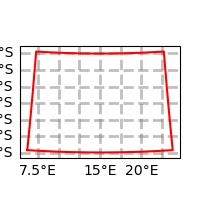

In [22]:
from Modules.map_tools.map_tools import plot_grid, plot_outline

plt.style.use('_mpl-gallery')
figure = plt.figure()
ax = plot_outline(outputs, figure)
plot_grid(outputs, figure, ax, plot_shape = False)

# more arguments :
# 4 arg must be one off grid points, topo, 1/pm, 1/pn, angle, mask
# 5 arg is the shape file
# 6 arg is to plot shape or not
# plot_grid(outputs, figure, ax, 'topo', 'path_to_shape_file', )

FloatText(value=0.0, description='Old value:', disabled=True)

interactive(children=(FloatText(value=0.0, description='New value:'), Button(description='Run Interact', style…

16

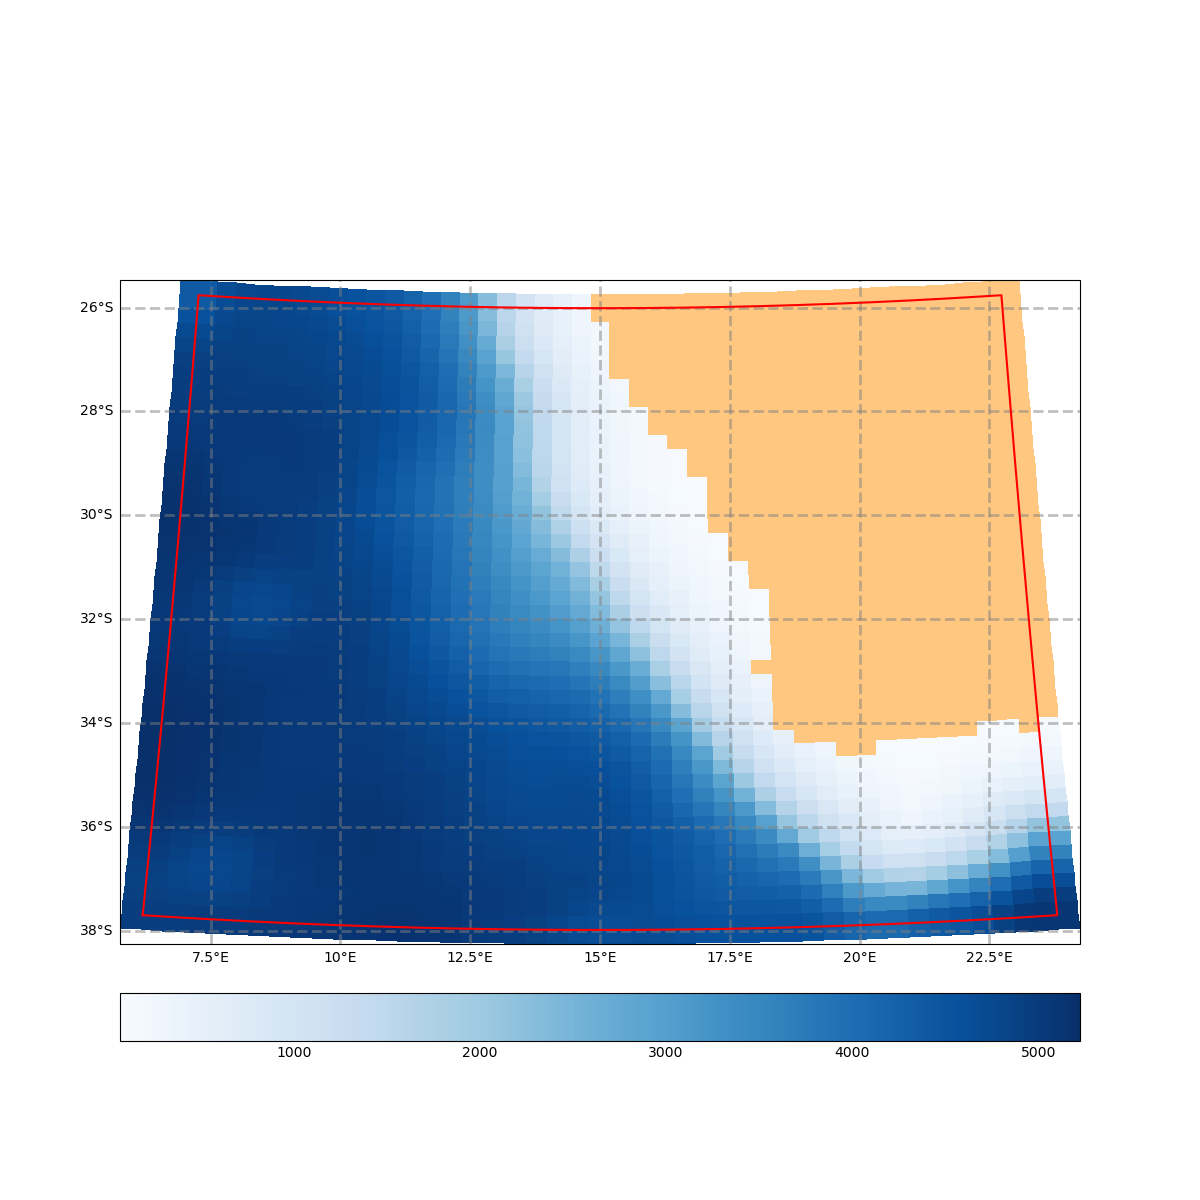

In [23]:
from Modules.map_tools.map_tools import plot_topo, plot_outline
from scipy.spatial import distance

plt.style.use('_mpl-gallery')
figure = plt.figure(figsize = (12,12))
ax = plot_outline(outputs, figure)

ax, cb = plot_topo(outputs, figure, ax)

x_rho, y_rho = outputs.lon_rho,outputs.lat_rho
data = np.vstack((x_rho.flatten(), y_rho.flatten())).T

# Find the closest node
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return closest_index, nodes[closest_index]
   
# Add mouse event
def on_click(event):
    global focusedPointX
    global focusedPointY
    pt = (event.xdata, event.ydata)
    prox_pt_id, prox_pt_value = closest_node(pt, data)
    
    # log(f'''\nx:{event.xdata} y:{event.ydata}\nid:{prox_pt_id} val:{prox_pt_value}''')
    p, mod = divmod(prox_pt_id, x_rho.shape[1])
    focusedPointX = p
    focusedPointY = mod
    oldValue.value = outputs.h[focusedPointX][focusedPointY]

# Add log for debug
# logwx = widgets.Textarea(value='Logs!', disabled=False)
# def log(txt):
#    logwx.value =  logwx.value + f'''{txt}'''
# display(logwx)

oldValue = widgets.FloatText(
    value=0.0,
    description='Old value:',
    disabled=True
)
display(oldValue)

def f(x):
    global ax
    global cb
    outputs.h[focusedPointX][focusedPointY] = x
    plt.cla()
    cb.remove()
    ax, cb = plot_topo(outputs, figure, ax)
    
interact_manual(f, x=widgets.FloatText(
    value=0.0,
    description='New value:'
));

plt.connect('button_press_event', on_click)

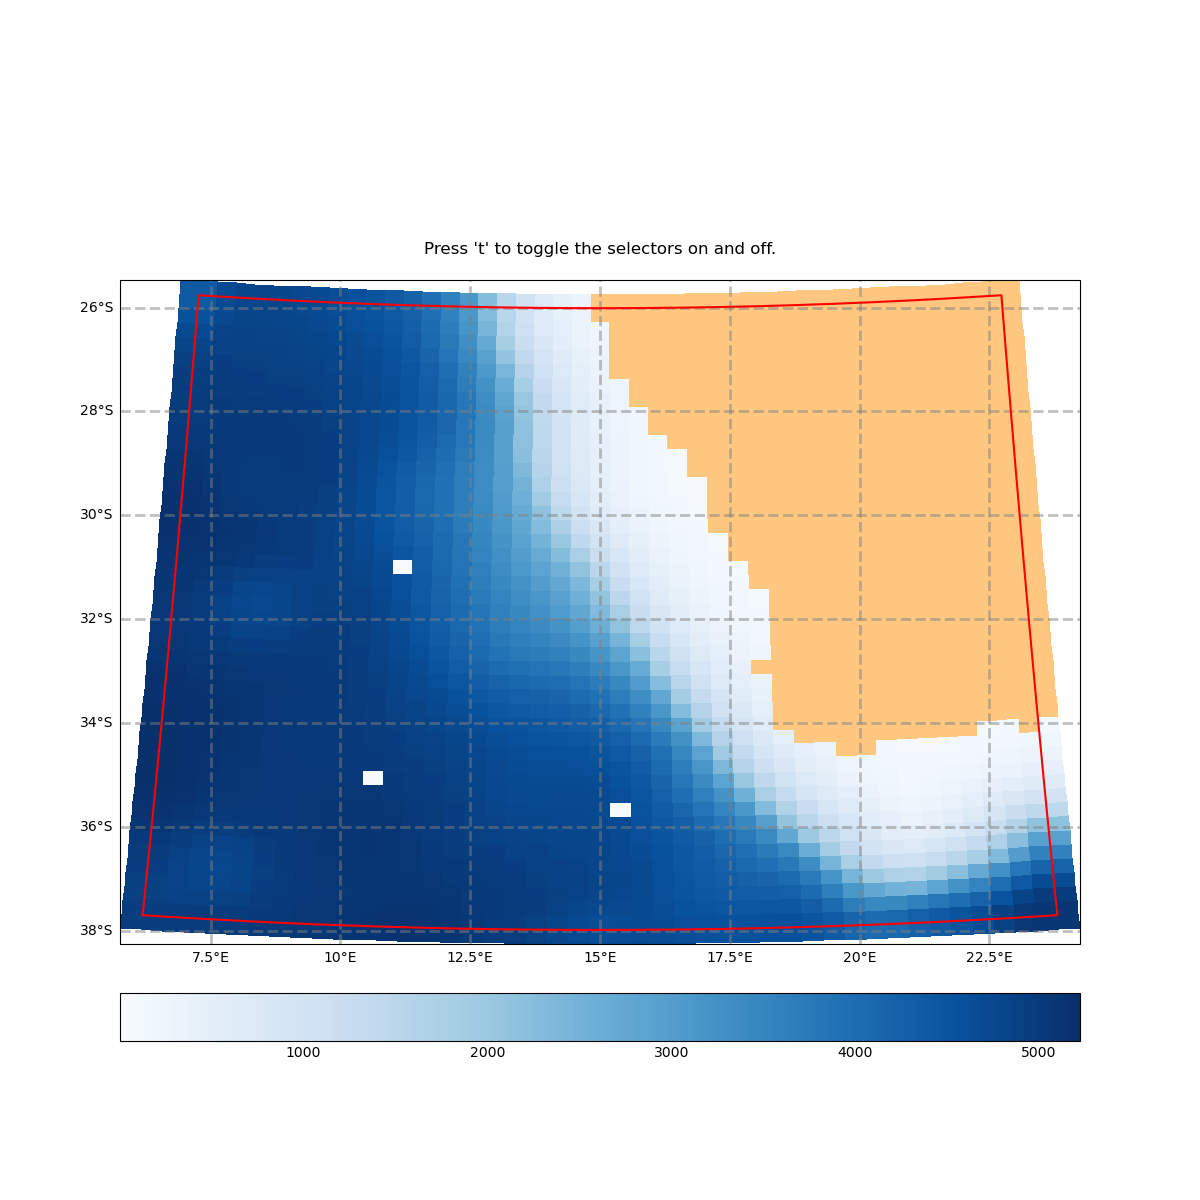

In [26]:
# Exemple with rectangle selector
from matplotlib.widgets import RectangleSelector

def toggle_selector(event):
    print('Key pressed.')
    if event.key == 't':
        for selector in selectors:
            name = type(selector).__name__
            if selector.active:
                print(f'{name} deactivated.')
                selector.set_active(False)
            else:
                print(f'{name} activated.')
                selector.set_active(True)
                
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize = (12,12))
ax = plot_outline(outputs, figure)

ax.set_title("Press 't' to toggle the selectors on and off.\n"
                 + ax.get_title())
plot_topo(outputs, figure, ax)


def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print(f"({x1:3.2f}, {y1:3.2f}) --> ({x2:3.2f}, {y2:3.2f})")
    print(f"The buttons you used were: {eclick.button} {erelease.button}")
    
selectors = []
selectors.append(RectangleSelector(
        ax, select_callback,
        useblit=True,
        button=[1, 3],  # disable middle button
        # minspanx=5, minspany=5,
        # spancoords='pixels',
        interactive=True))

In [ ]:
from Modules.croco_class import CROCO
CROCO.create_grid_nc(None, param.output_file, inputs, outputs)